In [31]:
import numpy as np
import cv2
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [32]:
one=pd.read_csv("D:\\yolo8\\one.csv")
two=pd.read_csv("D:\\yolo8\\two.csv")
three=pd.read_csv("D:\\yolo8\\three.csv")
four=pd.read_csv("D:\\yolo8\\four.csv")
six=pd.read_csv("D:\\yolo8\\six.csv")
eight=pd.read_csv("D:\\yolo8\\eight.csv")
yes=pd.read_csv("D:\\yolo8\\yes.csv")
i_love_you=pd.read_csv("D:\\yolo8\\i love you.csv")
please=pd.read_csv("D:\\yolo8\\please.csv")
x=pd.read_csv("D:\\yolo8\\x.csv")
a=pd.read_csv("D:\\yolo8\\a.csv")
c=pd.read_csv("D:\\yolo8\\c.csv")
f=pd.read_csv("D:\\yolo8\\f.csv")
g=pd.read_csv("D:\\yolo8\\g.csv")
h=pd.read_csv("D:\\yolo8\\h.csv")
help=pd.read_csv("D:\\yolo8\\help.csv")
house=pd.read_csv("D:\\yolo8\\house.csv")
w=pd.read_csv("D:\\yolo8\\w.csv")
z=pd.read_csv("D:\\yolo8\\z.csv")


In [33]:
data=pd.concat([one,two,three,four,six,eight,yes,i_love_you,please,x,a,c,f,g,h,help,house,w,z])
data.shape

(4880, 43)

In [34]:
data=shuffle(data)

In [35]:
print(data.columns)
print(data.isna().sum())

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', 'label'],
      dtype='object')
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
label    0
dtype: int64


In [36]:
# Exporting the DataFrame to a CSV file
data.to_csv('final_concatenated_data.csv', index=False)

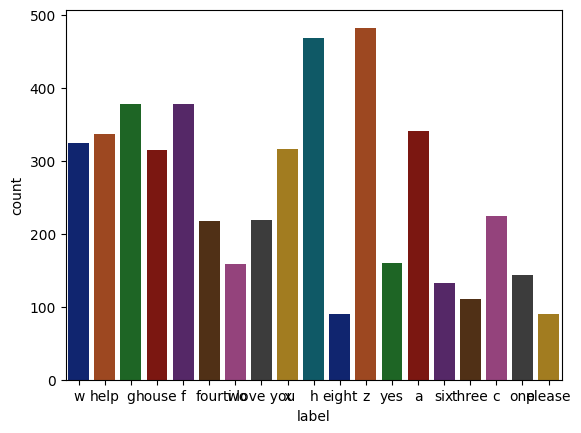

In [37]:
X=data.drop(columns=['label'])
y=data['label']
sns.countplot(x='label',data=data,hue='label',palette='dark')
plt.show()

In [38]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Initialize and apply MinMaxScaler to X
minmax = MinMaxScaler()
X = minmax.fit_transform(X)

# Initialize and apply LabelEncoder to y
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.15, shuffle=True, random_state=11)

# Verify the shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Optional: Display the mapping of original labels to encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)


(4148, 42) (732, 42) (4148,) (732,)
Label Mapping: {'a': 0, 'c': 1, 'eight': 2, 'f': 3, 'four': 4, 'g': 5, 'h': 6, 'help': 7, 'house': 8, 'i love you': 9, 'one': 10, 'please': 11, 'six': 12, 'three': 13, 'two': 14, 'w': 15, 'x': 16, 'yes': 17, 'z': 18}


In [45]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tqdm import tqdm
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.linear_model import SGDClassifier, Perceptron, LogisticRegression, LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# List of models to evaluate
models = [
    LinearSVC(),
    SGDClassifier(),
    Perceptron(),
    LogisticRegression(),
    LogisticRegressionCV(),
    MLPClassifier(),
    SVC(),
    NuSVC(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    HistGradientBoostingClassifier(),
    AdaBoostClassifier(),
    ExtraTreesClassifier(),
    BaggingClassifier(),
    BernoulliNB(),
    GaussianNB(),
    KNeighborsClassifier(),
    QuadraticDiscriminantAnalysis()
]

# Prepare an empty list to collect the results
results = []

# Iterate over each model
for model in tqdm(models):
    model_name = model.__class__.__name__
    try:
        model.fit(X_train, y_train)  # Assuming X_train and y_train are defined
        y_pred = model.predict(X_test)  # Assuming X_test is defined

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
        recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
        f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)
        
        # Append the results to the list as a dictionary
        results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })

    except Exception as e:
        print(f"Model {model_name} failed: {e}")

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

print(results_df)


 11%|█         | 2/18 [00:00<00:03,  4.58it/s]c:\Users\TMM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 22%|██▏       | 4/18 [00:00<00:02,  5.46it/s]c:\Users\TMM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also re

Model NuSVC failed: specified nu is infeasible


 61%|██████    | 11/18 [01:15<01:26, 12.34s/it]c:\Users\TMM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
100%|██████████| 18/18 [01:17<00:00,  4.30s/it]

                             Model  Accuracy  Precision    Recall  F1 Score
0                        LinearSVC  0.978142   0.968537  0.945489  0.924940
1                    SGDClassifier  0.952186   0.954848  0.913083  0.900973
2                       Perceptron  0.960383   0.946663  0.935902  0.907830
3               LogisticRegression  0.965847   0.957456  0.936920  0.914962
4             LogisticRegressionCV  0.978142   0.966280  0.945489  0.923763
5                    MLPClassifier  0.982240   0.950000  0.949077  0.941918
6                              SVC  0.980874   0.970526  0.947368  0.926901
7           RandomForestClassifier  0.967213   0.902404  0.902341  0.902241
8       GradientBoostingClassifier  0.965847   0.900638  0.901401  0.900815
9   HistGradientBoostingClassifier  0.967213   0.899991  0.902341  0.900986
10              AdaBoostClassifier  0.214481   0.890109  0.172195  0.101541
11            ExtraTreesClassifier  0.968579   0.903281  0.903281  0.903158
12          

In [48]:
import pandas as pd

# Convert the results list to a DataFrame
Model_accuracy = pd.DataFrame(results)

# Set the index to model names
#Model_accuracy.index = [model['Model'] for model in results]

# Display the result
print(Model_accuracy)



                             Model  Accuracy  Precision    Recall  F1 Score
0                        LinearSVC  0.978142   0.968537  0.945489  0.924940
1                    SGDClassifier  0.952186   0.954848  0.913083  0.900973
2                       Perceptron  0.960383   0.946663  0.935902  0.907830
3               LogisticRegression  0.965847   0.957456  0.936920  0.914962
4             LogisticRegressionCV  0.978142   0.966280  0.945489  0.923763
5                    MLPClassifier  0.982240   0.950000  0.949077  0.941918
6                              SVC  0.980874   0.970526  0.947368  0.926901
7           RandomForestClassifier  0.967213   0.902404  0.902341  0.902241
8       GradientBoostingClassifier  0.965847   0.900638  0.901401  0.900815
9   HistGradientBoostingClassifier  0.967213   0.899991  0.902341  0.900986
10              AdaBoostClassifier  0.214481   0.890109  0.172195  0.101541
11            ExtraTreesClassifier  0.968579   0.903281  0.903281  0.903158
12          

In [49]:
Model_accuracy

,Model,Accuracy,Precision,Recall,F1 Score
0,LinearSVC,0.978142,0.968537,0.945489,0.924940
1,SGDClassifier,0.952186,0.954848,0.913083,0.900973
2,Perceptron,0.960383,0.946663,0.935902,0.907830
3,LogisticRegression,0.965847,0.957456,0.936920,0.914962
4,LogisticRegressionCV,0.978142,0.966280,0.945489,0.923763
5,MLPClassifier,0.982240,0.950000,0.949077,0.941918
6,SVC,0.980874,0.970526,0.947368,0.926901
7,RandomForestClassifier,0.967213,0.902404,0.902341,0.902241
8,GradientBoostingClassifier,0.965847,0.900638,0.901401,0.900815
9,HistGradientBoostingClassifier,0.967213,0.899991,0.902341,0.900986


In [59]:
max_indices = Model_accuracy.idxmax()
L = list(Model_accuracy.iloc[max_indices[0]])

# Extract only numeric values from L (excluding the model name)
numeric_values = [float(i) for i in L[1:]]  # Skip the first element which is the model name

# Print the model name along with the numeric values formatted
print(f"Model is {L[0]}\nAccuracy:  {numeric_values[0]:.2f},\nPrecision: {numeric_values[1]:.2f}, \nRecall:    {numeric_values[2]:.2f}, \nF1 Score:  {numeric_values[3]:.2f}")


Model is SVC
Accuracy:  0.98,
Precision: 0.97, 
Recall:    0.95, 
F1 Score:  0.93


C:\Users\TMM\AppData\Local\Temp\ipykernel_20032\3841540719.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  L = list(Model_accuracy.iloc[max_indices[0]])


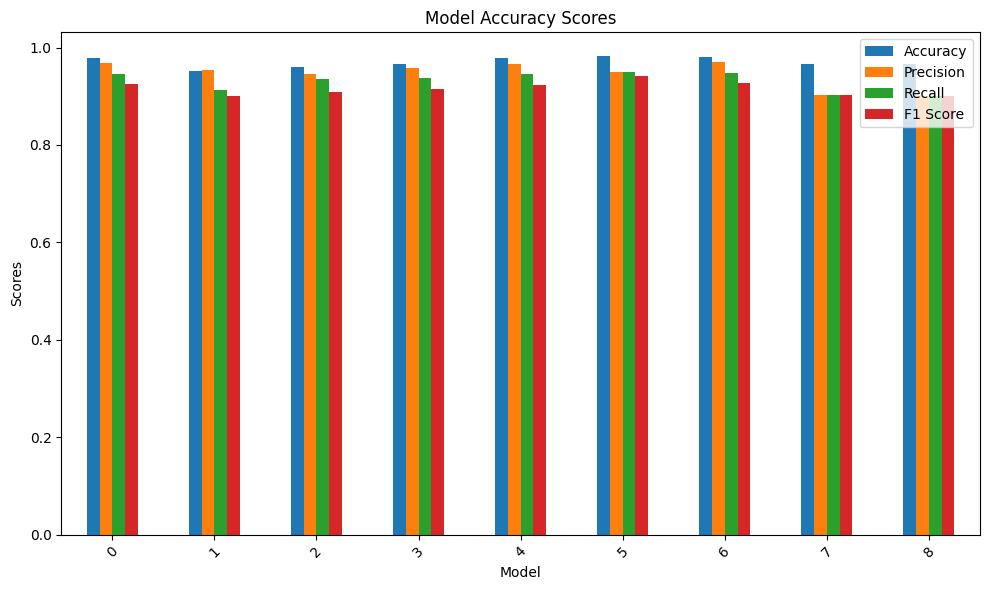

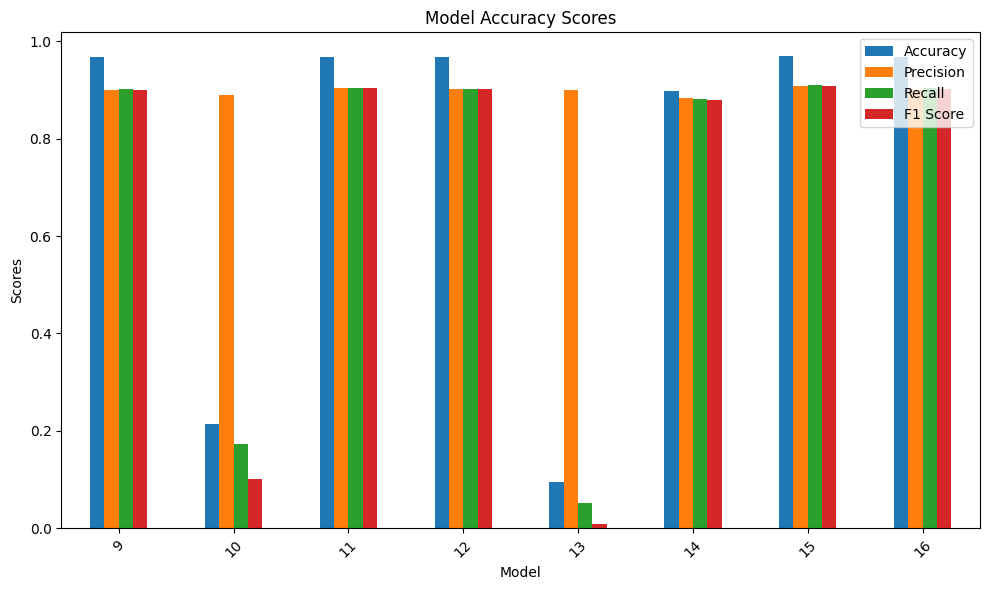

In [60]:
# Plotting first set (0 to 8)
Model_accuracy.iloc[:9,].plot(kind='bar', figsize=(10, 6))

# Customizing the plot
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Model Accuracy Scores')
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.legend(loc='upper right')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Plotting second set (9 to 17)
Model_accuracy.iloc[9:18,].plot(kind='bar', figsize=(10, 6))

# Customizing the plot
plt.title('Model Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Scores')
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.legend(loc='upper right')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


In [61]:
import joblib

# Assuming Model_accuracy has the format where model names are in the index
# and accuracy scores are in one of the columns, e.g., 'Accuracy'
# Get the index of the best model based on the highest accuracy
best_model_index = Model_accuracy['Accuracy'].idxmax()

# Assuming 'models' is a dictionary or list where the models are stored
# Retrieve the best model based on the index from the Model_accuracy DataFrame
best_model = models[best_model_index]  # Replace 'models' with your actual model container

# Save the best model using joblib
joblib.dump(best_model, f'best_model_{best_model_index}.joblib')

print(f"The best model ({best_model_index}) has been saved successfully.")


The best model (5) has been saved successfully.
